In [4]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [5]:
bad_songs = pd.read_csv('datasets/bad_cleaned2.csv')
bad_songs.dropna(inplace=True)
bad_songs

,artist,song,lyrics
0,YG,BAND DRUM (feat. A$AP Rocky),I mix the 4Hunnid with the designer Stay lace...
1,Chris Cooq,Lactose,I came to rule this stage with that Budden swa...
2,Chris Cooq,Same - Original mix,Gorillaz - Song Machine Episode 7 - 4/4 mxmto...
3,Curbo,Debauchery - Original mix,"Learning is, indeed, a very great and a very..."
4,G Herbo,Bon appétit,"Young nigga eatin', uh, bon appetit, uh Messe..."
...,...,...,...
3468,King John,Mismatched,"We've been dispatched by God, sent to warn the..."
3469,Buck Meek,Cannonball!,"Beats me down by the pool, sweet Suzy, summer’..."
3470,Big Beats,Young Forever (Instrumental),Proving himself in the booth was just the be...
3471,Big Beats,Escape (Instrumental),"I'm just me, I can't be different Thoug..."


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

# Read the dataset
bad_songs = pd.read_csv('datasets/bad_cleaned2.csv')
bad_songs.dropna(inplace=True)

# Split the dataset into train and test sets
X_train, X_test = train_test_split(bad_songs['lyrics'], test_size=0.2, random_state=42)

# Combine the lyrics in the train set into a single column
train_combined_lyrics = ' '.join(X_train)



In [8]:
# Download the English stop words from NLTK
nltk.download('stopwords')
english_stop_words = stopwords.words('english')

# Get the Spanish stop words from NLTK
nltk.download('stopwords')
spanish_stop_words = stopwords.words('spanish')

# Combine the stop words into a single list
stop_words = english_stop_words + spanish_stop_words

# Create a CountVectorizer object
vect = CountVectorizer(stop_words=stop_words)

# Fit and transform the training data
text_train = vect.fit_transform([train_combined_lyrics])

# Transform the test data
text_test = vect.transform(X_test)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elits\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elits\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


c:\Users\elits\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


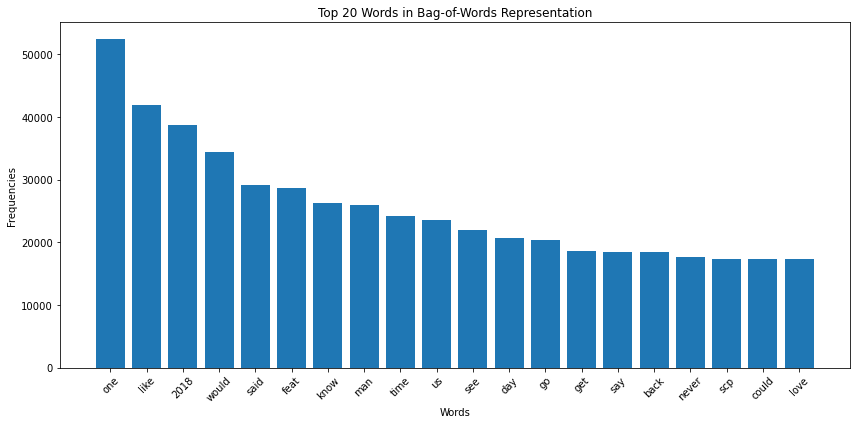

In [9]:
# Get the feature names (words) from the CountVectorizer
feature_names = vect.get_feature_names()

# Calculate the word frequencies in the training set
word_frequencies = text_train.sum(axis=0).A1

# Create a dictionary with words as keys and their corresponding frequencies as values
word_freq_dict = dict(zip(feature_names, word_frequencies))

# Sort the dictionary by word frequencies in descending order
sorted_word_freq = sorted(word_freq_dict.items(), key=lambda x: x[1], reverse=True)

# Extract the top 20 words and their frequencies
top_words = [item[0] for item in sorted_word_freq[:20]]
top_freqs = [item[1] for item in sorted_word_freq[:20]]

# Plot the top 20 words and their frequencies
plt.figure(figsize=(12, 6))
plt.bar(top_words, top_freqs)
plt.xlabel('Words')
plt.ylabel('Frequencies')
plt.title('Top 20 Words in Bag-of-Words Representation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
pd.set_option('display.max_colwidth', None)
result = bad_songs['lyrics'].str.contains('one').sum()
result

2845